In [1]:
from __future__ import division, absolute_import, print_function
%load_ext autoreload
%autoreload 2

from hepran.bzipscore import *
import hepran.utils as u
import hepran.registers as r
import os
CCO = os.environ.get("CCO", r"C:\Projekti_KI\ortoCC\CoiledCoilOrtho")

#os.chdir(r"D:\data\ortoCC\design-with-alignments\4heptade-7")
print(os.getcwd())

#score the fasta (takes about 10 min)
#!{CCO}/fastscore.exe full4heptad.fasta --out-name=full4heptad_B07 --align=-7,0,7 --orientation=B



fit_name = 'DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10'
N_iter = 5

#cutoff line:
alignment = "P07"
delta = 7
set_type = '4H_1or2N_sameGE'


#read ENV vars if they are set
N_iter = os.environ.get('N_iter', N_iter)
fit_name = os.environ.get('fit_name', fit_name)
delta = float(os.environ.get('delta', delta))
alignment = os.environ.get('alignment', alignment)
set_type = os.environ.get('set_type', set_type)
al = alignment


name = '{set_type}_{N_iter}_{fit_name}'.format(**locals())

dir_name = name+"-{al}-DEL{delta:.2f}".format(**locals())


input_fasta = 'full4heptad.fasta'
input_score_file = '../scores/{N_iter}_{fit_name}-{al}.bin'.format(**locals())

print("")
print("fit_name = " +fit_name)
print("N_iter = " + str(N_iter))
print("alignment = " +alignment)
print("delta = " + str(delta))
print("set_type = " +set_type)

d:\data\ortoCC\fine_tune_scoring_function\NEW_sets

fit_name = DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10
N_iter = 5
alignment = P07
delta = 7.0
set_type = 4H_1or2N_sameGE


In [2]:
filtered_fasta = set_type+'.fasta'
score_file = name+'.bin'
#if not os.path.isfile(filtered_fasta): 
#Filtering
ids = get_ids_from_fasta(input_fasta)
fasta = u.load_fasta(input_fasta)

if set_type == '4H_1or2N':
    filtered_ids = [i for i in ids if r.one_or_two_N(fasta[i], 'f')]
    print(len(filtered_ids))
if set_type == '4H_1or2N_sameGE':
    filtered_ids = [i for i in ids if r.one_or_two_N(fasta[i], 'f') and r.same_ge(fasta[i], 'f')]
    print(len(filtered_ids))
    

filter_fasta(fasta, filtered_ids, filtered_fasta)

filter_bin_score_file(input_score_file, input_fasta, filtered_ids, score_file, invert=True)
print(score_file)

160
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10.bin


In [3]:
from __future__ import division, absolute_import, print_function
%load_ext autoreload
%autoreload 2
import os

import hepran
from hepran.bzipscore import *
import hepran.utils as u
import hepran.registers as r
import numpy as np
CCO = os.environ.get("CCO",r"C:\Projekti_KI\ortoCC\CoiledCoilOrtho")
from glob import glob
import pandas as pd
from StringIO import StringIO

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk',  font_scale=1.5)
sns.set_style('white')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
c_list = []
print(dir_name)
for bc in np.linspace(-35,-55, 21):
    nc = bc + delta
    cutoff = u.Cutoff(binding=bc, nonbinding=nc)
    c_list.append(cutoff)
            
print(len(c_list))
c_list

4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00
21


[Cutoff(binding=-35.0, nonbinding=-28.0),
 Cutoff(binding=-36.0, nonbinding=-29.0),
 Cutoff(binding=-37.0, nonbinding=-30.0),
 Cutoff(binding=-38.0, nonbinding=-31.0),
 Cutoff(binding=-39.0, nonbinding=-32.0),
 Cutoff(binding=-40.0, nonbinding=-33.0),
 Cutoff(binding=-41.0, nonbinding=-34.0),
 Cutoff(binding=-42.0, nonbinding=-35.0),
 Cutoff(binding=-43.0, nonbinding=-36.0),
 Cutoff(binding=-44.0, nonbinding=-37.0),
 Cutoff(binding=-45.0, nonbinding=-38.0),
 Cutoff(binding=-46.0, nonbinding=-39.0),
 Cutoff(binding=-47.0, nonbinding=-40.0),
 Cutoff(binding=-48.0, nonbinding=-41.0),
 Cutoff(binding=-49.0, nonbinding=-42.0),
 Cutoff(binding=-50.0, nonbinding=-43.0),
 Cutoff(binding=-51.0, nonbinding=-44.0),
 Cutoff(binding=-52.0, nonbinding=-45.0),
 Cutoff(binding=-53.0, nonbinding=-46.0),
 Cutoff(binding=-54.0, nonbinding=-47.0),
 Cutoff(binding=-55.0, nonbinding=-48.0)]

In [5]:
%%time
for cutoff in c_list:
    print(cutoff)
    a_dir, set_files = get_sets(dir_name+"/"+name, binding_cutoff=cutoff.binding, nonbinding_cutoff=cutoff.nonbinding,
                                 alignment=al,
                                 fasta=filtered_fasta, score_file=score_file,
                                 solver_exe=CCO+"/solver.exe", fake=False, verbose=False, skip_existing=False,
                                 timeout_s=600)
    for set_file in set_files:
        print(set_file)
        analyse_set_file(set_file, filtered_fasta, alignment=al,
                         scorer_exe=None, 
                         input_score_file=score_file, invert=True,
                         normalization_min=0, normalization_max=80,
                         verbose=False, skip_drawing=True)
        

Cutoff(binding=-35.0, nonbinding=-28.0)
Cutoff(binding=-36.0, nonbinding=-29.0)
Cutoff(binding=-37.0, nonbinding=-30.0)
Cutoff(binding=-38.0, nonbinding=-31.0)


c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:996: UserWarning: File does not exist: 4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-38.00_nc-31.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)


Cutoff(binding=-39.0, nonbinding=-32.0)


c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:996: UserWarning: File does not exist: 4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-39.00_nc-32.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)


Cutoff(binding=-40.0, nonbinding=-33.0)


c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:996: UserWarning: File does not exist: 4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-40.00_nc-33.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)


Cutoff(binding=-41.0, nonbinding=-34.0)


c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:996: UserWarning: File does not exist: 4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-41.00_nc-34.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)


Cutoff(binding=-42.0, nonbinding=-35.0)


c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:996: UserWarning: File does not exist: 4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-42.00_nc-35.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)


4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-42.00_nc-35.00/all.00.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-42.00_nc-35.00/hetero.00.set
Cutoff(binding=-43.0, nonbinding=-36.0)


c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:996: UserWarning: File does not exist: 4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-43.00_nc-36.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)


4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-43.00_nc-36.00/all.00.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-43.00_nc-36.00/hetero.00.set
Cutoff(binding=-44.0, nonbinding=-37.0)
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-44.00_nc-37.00/all.00.set


c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:996: UserWarning: File does not exist: 4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-44.00_nc-37.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)


4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-44.00_nc-37.00/hetero.00.set
Cutoff(binding=-45.0, nonbinding=-38.0)


c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:996: UserWarning: File does not exist: 4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-45.00_nc-38.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)


4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-45.00_nc-38.00/all.00.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-45.00_nc-38.00/all.01.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-45.00_nc-38.00/all.02.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-45.00_nc-38.00/all.03.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-45.00_nc-38.00/all.04.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertic

c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:996: UserWarning: File does not exist: 4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-46.00_nc-39.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)


4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-46.00_nc-39.00/all.00.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-46.00_nc-39.00/all.01.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-46.00_nc-39.00/all.02.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-46.00_nc-39.00/all.03.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-46.00_nc-39.00/all.04.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertic

c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:996: UserWarning: File does not exist: 4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-47.00_nc-40.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)


4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-47.00_nc-40.00/all.00.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-47.00_nc-40.00/all.01.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-47.00_nc-40.00/all.02.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-47.00_nc-40.00/all.03.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-47.00_nc-40.00/all.04.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertic

c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:996: UserWarning: File does not exist: 4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-48.00_nc-41.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)
c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:996: UserWarning: File does not exist: 4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-49.00_nc-42.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)


4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-48.00_nc-41.00/all.00.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-48.00_nc-41.00/hetero.00.set
Cutoff(binding=-49.0, nonbinding=-42.0)
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-49.00_nc-42.00/all.00.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-49.00_nc-42.00/all.01.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-49.00_nc-42.00/hetero.00.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H

c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:996: UserWarning: File does not exist: 4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-50.00_nc-43.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)
c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:996: UserWarning: File does not exist: 4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-51.00_nc-44.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)


4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-50.00_nc-43.00/all.00.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-50.00_nc-43.00/hetero.00.set
Cutoff(binding=-51.0, nonbinding=-44.0)
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-51.00_nc-44.00/all.00.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-51.00_nc-44.00/all.01.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-51.00_nc-44.00/all.02.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1o

c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:996: UserWarning: File does not exist: 4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-52.00_nc-45.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)


4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-52.00_nc-45.00/all.00.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-52.00_nc-45.00/all.01.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-52.00_nc-45.00/all.02.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-52.00_nc-45.00/all.03.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-52.00_nc-45.00/all.04.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertic

c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:996: UserWarning: File does not exist: 4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-53.00_nc-46.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)


4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-53.00_nc-46.00/all.00.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-53.00_nc-46.00/hetero.00.set
Cutoff(binding=-54.0, nonbinding=-47.0)


c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:996: UserWarning: File does not exist: 4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-54.00_nc-47.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)


4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-54.00_nc-47.00/all.00.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-54.00_nc-47.00/all.01.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-54.00_nc-47.00/all.02.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-54.00_nc-47.00/all.03.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-54.00_nc-47.00/all.04.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertic

c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:996: UserWarning: File does not exist: 4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-55.00_nc-48.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)


4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-55.00_nc-48.00/all.00.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-55.00_nc-48.00/all.01.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-55.00_nc-48.00/hetero.00.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-55.00_nc-48.00/hetero.01.set
Wall time: 19.2 s


In [6]:
set_infos = glob(dir_name+"/*/*.set_info")
df = load_set_infos_to_dataframe(set_infos)
df.sort_values(by="N_pairs N_heterodimers total_IN_mismatches total_electrostatic_mismatches".split(), ascending=[False, False, True, True], inplace=True)
df;

In [7]:
mp = get_max_pairs_by_type(df)
mp.sort_values(by="binding_cutoff", inplace=True)
mp.reset_index(inplace=True)
mp;

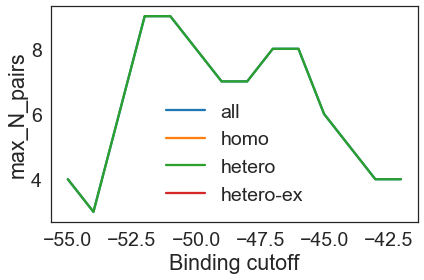

In [8]:
%matplotlib inline

plt.figure()
for pair_type in ["all", "homo", "hetero", "hetero-ex"]:
    df_type = mp[mp.type == pair_type]
    plt.plot(df_type.binding_cutoff, df_type.max_N_pairs, label=pair_type)

    
#plt.title(dir_name)       

plt.legend()
plt.ylabel("max_N_pairs")
plt.xlabel("Binding cutoff")
plt.tight_layout()
plt.savefig(dir_name+"/max_N_pairs.png")

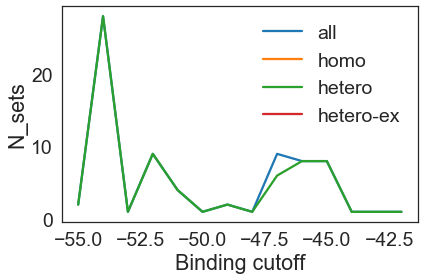

In [9]:
plt.figure()
for pair_type in ["all", "homo", "hetero", "hetero-ex"]:
    df_type = mp[mp.type == pair_type]
    plt.plot(df_type.binding_cutoff, df_type.count_max_sets, label=pair_type)

plt.legend()
plt.ylabel("N_sets")
plt.xlabel("Binding cutoff")
plt.tight_layout()
plt.savefig(dir_name+"/N_sets.png")
#plt.ylim([0, 15])

In [10]:
mp.sort_values(by="max_N_pairs", ascending=False, inplace=True)
mp.to_excel(dir_name+"/main_sets.xlsx")
df.to_excel(dir_name+"/all_sets.xlsx")


In [11]:
#analyse set files
df_to_plot = df.query("N_pairs >= 8")
set_files = list(df_to_plot["!full_name"])

dirs = [os.path.dirname(sf) for sf in set_files]
dirs = list(set(dirs))

all_set_files = []
for d in dirs:
    sf = glob(d+"/*.set")
    all_set_files += sf
all_set_files;

In [12]:
%%time
comp = analyse_sets(all_set_files, filtered_fasta, alignment=al, scorer_exe=None,  
                    input_score_file=score_file, invert=True,
                    normalization_min=None, normalization_max=None,  
                    username="ajasja", password="agrftAGADIR", serial=False)


                         
for r in comp:
    print(r)

4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-47.00_nc-40.00\all.00.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-47.00_nc-40.00\all.01.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-47.00_nc-40.00\all.02.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-47.00_nc-40.00\all.03.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10_P07_bc-47.00_nc-40.00\all.04.set
4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10-P07-DEL7.00/4H_1or2N_sameGE_5_DNA-ALL-basicL-rep-core_vertic